<a href="https://colab.research.google.com/github/rtmazzeo/cursos_python/blob/main/cursos_pandas/aula001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"
dados = pd.read_csv(url, sep=';')


In [4]:
dados.head(10) #mostra as 10 primeiras linhas


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


<h2> Explorar as caracteristicas gerais dos dados

In [5]:
print(f"Esses dataframe possui {dados.shape[0]} linhas e {dados.shape[1]} colunas")
print("Os cabeçalhos das colunas são:", end=" ")
for i, coluna in enumerate(dados.columns):
    # Adiciona uma vírgula e espaço após o primeiro elemento
    if i > 0:
        print(",", end=" ")
    print(coluna, end="")

# Adiciona uma quebra de linha no final
print(end=".")

Esses dataframe possui 32960 linhas e 9 colunas
Os cabeçalhos das colunas são: Tipo, Bairro, Quartos, Vagas, Suites, Area, Valor, Condominio, IPTU.

In [6]:
dados.describe() # Estatistica descritiva dos dados (contagem, media, std, min, 25%, 50%, 75% e max)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


<h2> Análise exploratória de dados</h2>

<h3> Qual o valor médio de aluguel por tipo de imóvel? <h3>


In [7]:
df_preco_tipo = dados.groupby("Tipo")[['Valor']].mean(numeric_only=True).sort_values('Valor')

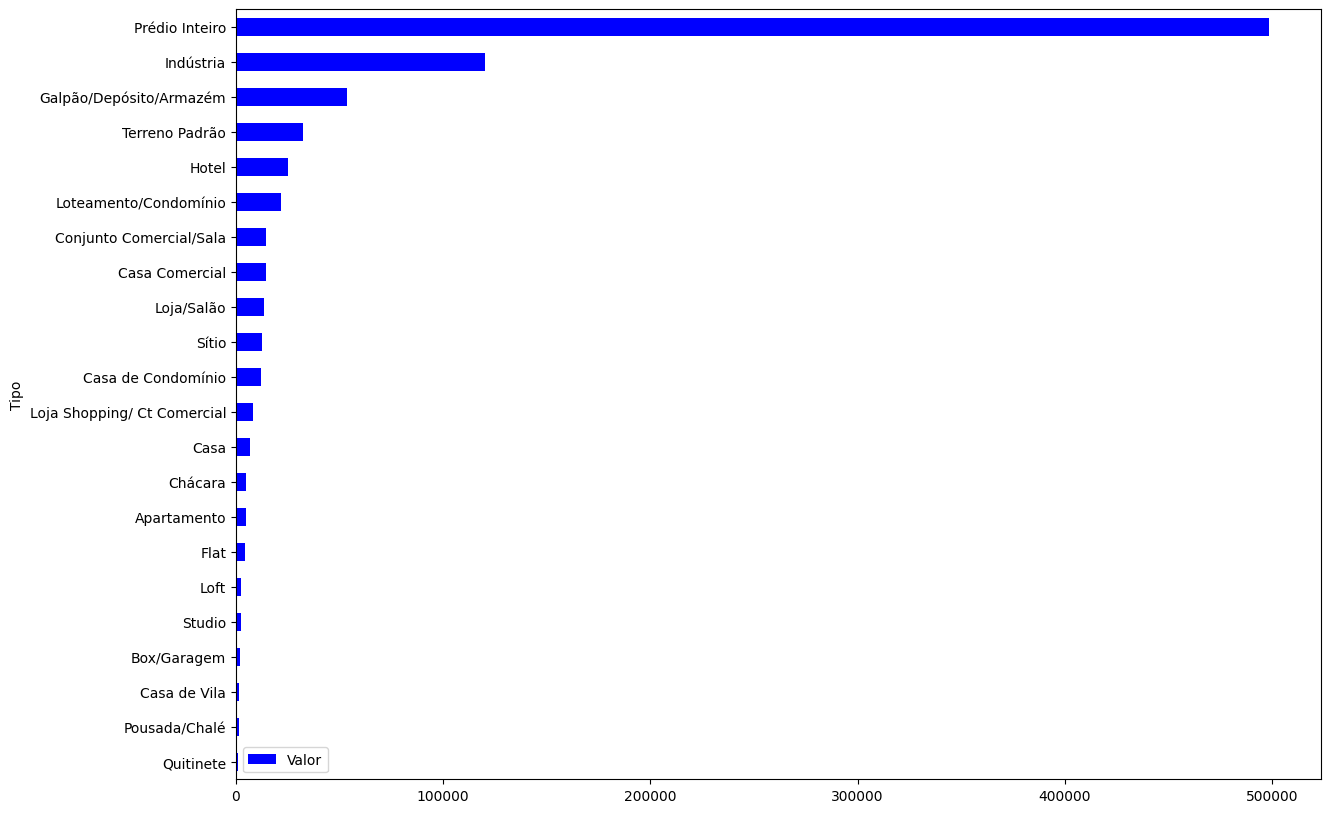

In [8]:
df_preco_tipo.plot(kind='barh',figsize=(14,10),color = 'blue');

<h3>Removendo os imóveis comerciais<h3>

In [9]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [10]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [11]:
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


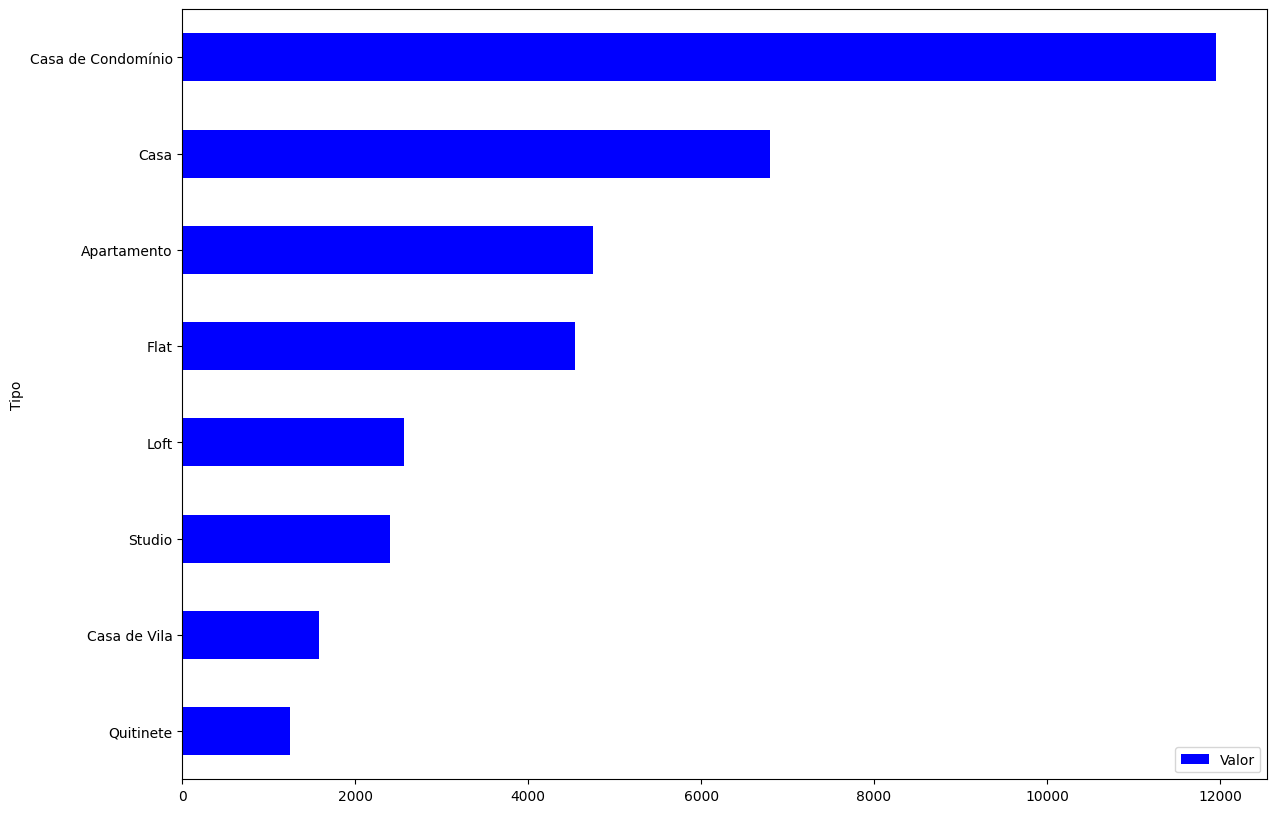

In [12]:
df_imoveis_residenciais = dados.query('@imoveis_comerciais not in Tipo')

df_preco_tipo_residenciais = df_imoveis_residenciais.groupby("Tipo")[['Valor']].mean(numeric_only=True).sort_values('Valor')

df_preco_tipo_residenciais.plot(kind='barh',figsize=(14,10),color = 'blue');

<h3>Qual o percentual de cada tipo de imovel na nossa base de dados?</h3>

In [13]:
df_imoveis_residenciais.Tipo.value_counts(normalize=True)

Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: Tipo, dtype: float64

In [14]:
df_percentual_tipo = df_imoveis_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

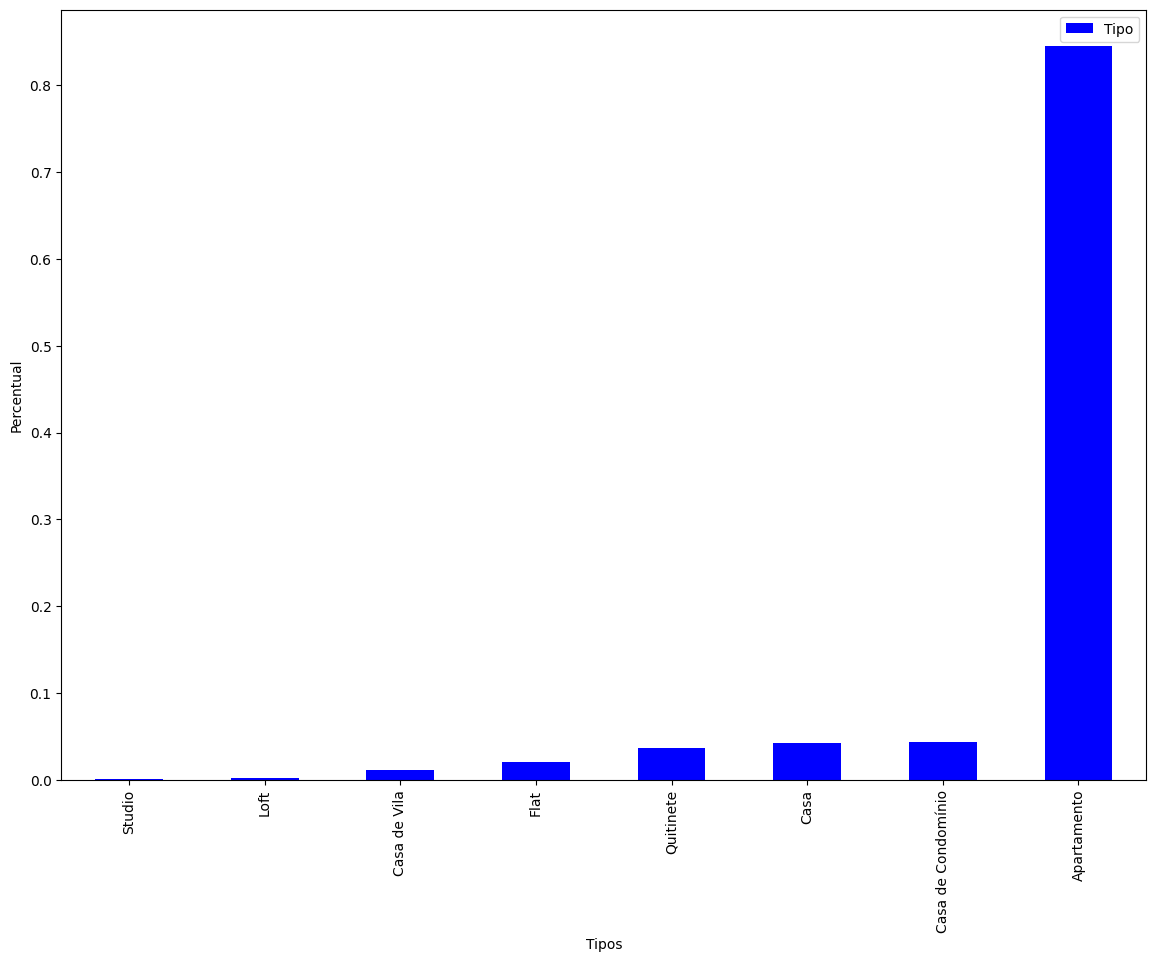

In [15]:
df_percentual_tipo.plot(kind='bar',figsize=(14,10),color = 'blue',
                        xlabel='Tipos',
                        ylabel='Percentual');

<h3> Selecionando apenas os imóveis do tipo apartamento</h3>

In [16]:
df_apartamento = df_imoveis_residenciais.query('Tipo == "Apartamento"')
df_apartamento.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [17]:
df_apartamento = df_apartamento.copy()
#Para renomear uma coluna usa-se o método rename()
df_apartamento.rename(columns={'Tipo': 'Tipo do Imovel'}, inplace=True)
df_apartamento.head()

,Tipo do Imovel,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


<h3> Tratando dados Nulos <h3>

In [18]:
df_apartamento.isnull()

,Tipo do Imovel,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [19]:
df_apartamento.isnull().sum()

Tipo do Imovel       0
Bairro               0
Quartos              0
Vagas                0
Suites               0
Area                 0
Valor                7
Condominio         745
IPTU              5472
dtype: int64

In [20]:
df_apartamento=df_apartamento.fillna(0) #subtitui valores nulos por 0
df_apartamento.isnull().sum()

''' Outros modos de se tratar dados nulos:
dropna()
fillna()
interpolate() --> preenche com valores calculados a partir dos valores vizinhos

SyntaxError: ignored

<h3> Removendo Registros</h3>
<br>
- remover valor de aluguel igual a 0<br>
- remover valor de condominio igual a 0

In [21]:
df_apartamento.query("Valor == 0 | Condominio ==0")

,Tipo do Imovel,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [22]:
registro_a_remover = df_apartamento.query("Valor == 0 | Condominio ==0").index

In [23]:
df_apartamento.drop(registro_a_remover,axis=0,inplace=True)

In [24]:
df_apartamento.query("Valor == 0 | Condominio ==0")

,Tipo do Imovel,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [25]:
df_apartamento.rename(columns={'Tipo do Imovel':'Tipo'}, inplace=True)


In [26]:
#remoção da coluna Tipo, pois o único valor dela é 'Apartamento'
#para verificar o tipo de dados podemos usar df_apartamento.Tipo.unique()
df_apartamento.drop("Tipo",axis=1,inplace=True)
df_apartamento.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Centro,1,0,0,36,1200.0,NaN,NaN


In [27]:
df_apartamento.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Centro,1,0,0,36,1200.0,NaN,NaN


<h3> Aplicar Filtros</h3>

In [28]:
#Filtro 1: Apartamentos com 1 quarto e aluguel < R$ 1200

In [29]:
selecao1 = df_apartamento['Quartos']==1


In [30]:
df_apartamento[selecao1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
10,Centro,1,0,0,36,1200.0,NaN,NaN
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [31]:
selecao2= df_apartamento['Valor']<1200
df_apartamento[selecao2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,NaN
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,NaN
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN


In [32]:
selecao_final = (selecao1)&(selecao2)

In [33]:
df_apartamento[selecao_final]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32643,Guadalupe,1,0,0,40,550.0,NaN,NaN
32666,Bonsucesso,1,0,0,60,1000.0,NaN,NaN
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [34]:
df1 = df_apartamento[selecao_final]

In [35]:
#Apartamentos que possuem pelo menos 2 quartos, aluguel menor que 3000 e area maior que 70
selecao = (df_apartamento['Quartos']>=2) & (df_apartamento['Valor']<3000) &(df_apartamento['Area']>70)


In [36]:
df2 = df_apartamento[selecao]
df2.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,NaN
32,Botafogo,2,1,0,76,2500.0,740.0,NaN
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,NaN


<h3> Salvando os dados</h3>

In [37]:
df_apartamento.to_csv('dados_apartamentos.csv',sep=';',index=False)
df1.to_csv("selecao_01.csv",index=False, sep=';')
df2.to_csv("selecao_02.csv",index=False, sep=';')
